Javier Mencia

Part I

(array([499.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  43.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

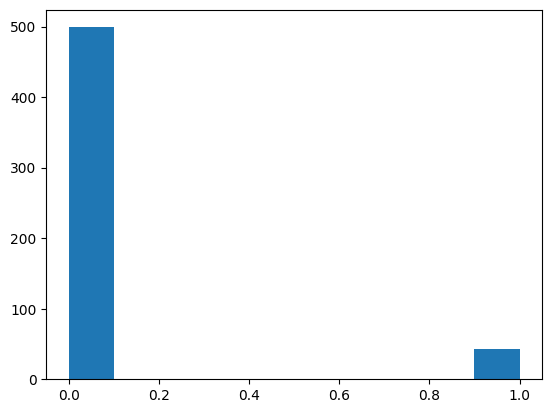

In [2]:
#Data import
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/javmencia/STA365javierMencia/main/laliga.csv'
data = pd.read_csv(url, on_bad_lines='skip')

data = data.fillna(0)
data['high_rating'] = data['Rating'].apply(lambda x: 1 if x > 6.9 else 0)
plt.hist(data["high_rating"])

In [3]:
import pymc as pm; import numpy as np
#n,p=len(y[0]),len(X[0])#; X,y=np.zeros((n,p)),np.ones((n,1))

y = np.array([[i] for i in data["high_rating"]]).reshape(-1, 1)
X = np.column_stack((data["Goals"], data["Assist"], data["YC"], data["RC"]))
n,p=len(y), len(X[0])

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # half normal
    y = pm.Bernoulli('y', logit_p=pm.math.dot(X, betas), observed=y)

with MLR:
    idata = pm.sample(chains = 4)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


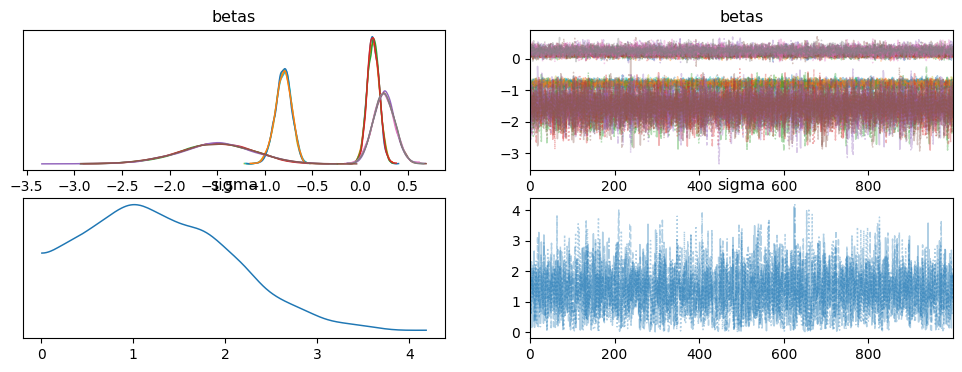

In [5]:
import arviz as az
az.plot_trace(idata, combined=True);


Part II

Here's the link for part II: https://github.com/javmencia/STA365javierMencia/blob/main/HW6Q2.pdf